In [2]:
import numpy as np
import matplotlib.pyplot as plt

## P6.- Model A

The attachment probability for a uniformly random connection is

\[
\Pi(k_i) = \frac{1}{t + m_0} \approx \frac{1}{t}.
\]

Then the mean-field degree evolution satisfies

\[
\frac{dk_i}{dt} = \frac{m}{t}.
\]

Integrating:

\[
k_i(t) = m \ln\left( \frac{t}{t_i} \right) + m.
\]

To obtain the degree distribution, invert:

\[
t_i = t \exp\left( -\frac{k - m}{m} \right).
\]

Probability that vertex was created before \(t_i\):

\[
P(k) \propto \exp\left(-\frac{k}{m}\right),
\]

an exponential distribution.

## P6.2 — Preferential Attachment with Fixed Number of Vertices (Model B)

Mean-field equation from the task:

\[
\frac{dk_i}{dt} =
\frac{N-1}{N}\frac{k_i}{2t} + \frac{1}{N}.
\]

Its solution is:

\[
k_i(t) =
\frac{2(N-1)}{N(N-2)} t
\approx \frac{2}{N} t
\quad\text{for large } N.
\]

Thus degrees grow linearly with time and the distribution is narrow
(compared to BA): **no scale-free tail appears**.


## P6.3

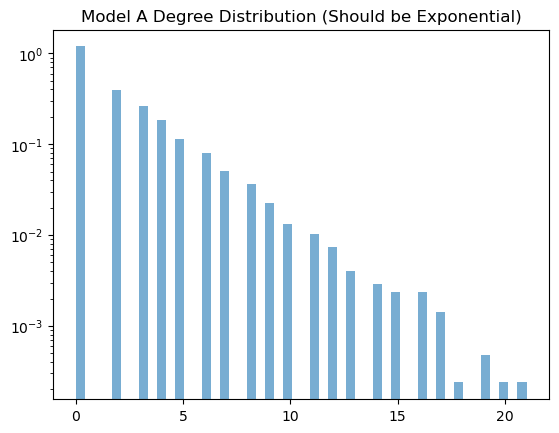

In [4]:
def model_A(T=5000, m=2):
    # start with m0 complete graph
    m0 = m
    G = {i: [] for i in range(m0)}
    degrees = [m0-1]*m0

    for t in range(m0, T):
        G[t] = []
        for _ in range(m):
            j = np.random.randint(0, t)
            degrees.append(0)
            degrees[j] += 1
            degrees[t] += 1
    return degrees

deg = model_A()

# Plot histogram
plt.hist(deg, bins=50, density=True, alpha=0.6)
plt.yscale("log")
plt.title("Model A Degree Distribution (Should be Exponential)")
plt.show()

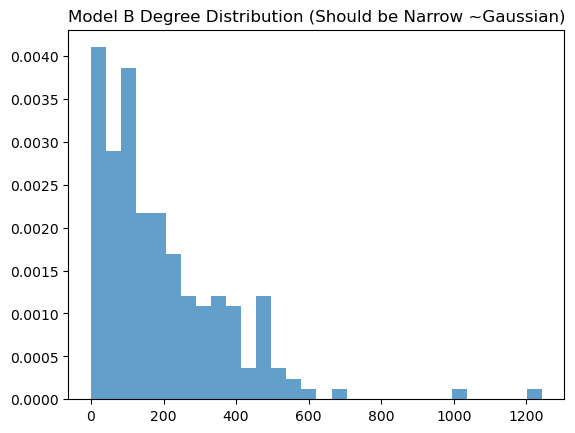

In [5]:
def model_B(N=200, T=20000):
    degrees = np.zeros(N)
    edges = []

    for t in range(T):
        pk = degrees + 1  # avoid zero probability
        pk = pk / pk.sum()

        # choose edge endpoints
        i = np.random.choice(N, p=pk)
        j = np.random.choice(N, p=pk)

        if i != j:
            edges.append((i, j))
            degrees[i] += 1
            degrees[j] += 1

    return degrees

deg_B = model_B()

plt.hist(deg_B, bins=30, density=True, alpha=0.7)
plt.title("Model B Degree Distribution (Should be Narrow ~Gaussian)")
plt.show()


## P6.5 — How to Derive the Degree Distribution for Model B?

We use the mean-field equation:

\[
\frac{dk_i}{dt} =
\frac{N-1}{N} \frac{k_i}{2t} + \frac{1}{N}.
\]

This is a linear ODE:

\[
\frac{dk}{dt} = a \frac{k}{t} + b,
\quad
a = \frac{N-1}{2N}, \;
b = \frac{1}{N}.
\]

Solve using integrating factor:

\[
k(t) t^{-a} = b \int t^{-a}\, dt.
\]

Thus the solution:

\[
k(t) = C t^{a} + \frac{b}{1-a} t.
\]

But for large \(t\), the linear term dominates:

\[
k(t) \approx \frac{2}{N} t.
\]

Since all degrees grow deterministically ≈ linearly and similarly,
the fluctuations are small → the degree distribution becomes **narrow**,
close to a **Gaussian**, not a power law.

Thus **Model B does not produce a scale-free network**.
